In [4]:
import nibabel as nib
import os
os.chdir('..')
epi_img = nib.load(r'data\mri\training01_01_flair_pp.nii')
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

(181, 217, 181)

Text(0.5, 0.98, 'Center slices for EPI image')

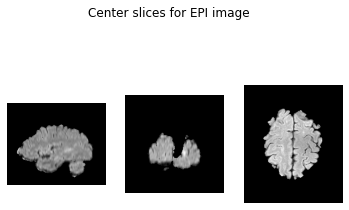

In [20]:
import matplotlib.pyplot as plt

def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")
       axes[i].set_axis_off()


slice_0 = epi_img_data[50, :, :]
slice_1 = epi_img_data[:, 182, :]
slice_2 = epi_img_data[:, :, 120]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")